In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sys import stdout
import os, glob
from scipy.signal import detrend
from scipy import arctan2
from scipy import signal
#freqs, times, spectrogram = signal.spectrogram(sig)
import functions as f
import math

import pdb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import array

from matplotlib.ticker import FormatStrFormatter
import sys
#sys.path.ap


sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler

# Load SONIC data

In [3]:
df_sonic = pd.read_csv("sonic_ws_10min_mean.csv",index_col=[0],parse_dates=True)
print(df_sonic.head())
df_sonic.index.name = "datetime"
df_sonic.columns = [float(s) for s in df_sonic.columns]

type(df_sonic.index)

                                0.9       2.4       4.0      10.1      16.8  \
2017-02-17 00:00:00+00:00  1.760506  2.085837  2.065484  2.482960  3.096731   
2017-02-17 00:10:00+00:00  1.488232  1.764777  1.759977  2.315117  2.915626   
2017-02-17 00:20:00+00:00  1.345313  1.587843  1.562011  2.217619  2.635905   
2017-02-17 00:30:00+00:00  1.359829  1.632719  1.597804  2.328974  2.699088   
2017-02-17 00:40:00+00:00  1.243604  1.538192  1.524335  2.259734  2.731474   

                              116.4     158.2      200.0  
2017-02-17 00:00:00+00:00  6.951333  7.622561  10.192081  
2017-02-17 00:10:00+00:00  5.957020  6.734694   9.236851  
2017-02-17 00:20:00+00:00  5.230997  5.939940   8.363798  
2017-02-17 00:30:00+00:00  6.534010  8.034880  10.702627  
2017-02-17 00:40:00+00:00  7.416316  8.817852  12.104825  


pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
# Isolate Time of Interest
ind1 = 36
ind2 = 54
init_time  =df_sonic.index[ind1] 
final_time =df_sonic.index[ind2] 

indxs = range(ind1,ind2)

df_LLJ = df_sonic.iloc[indxs]

heights = df_LLJ.keys()

times = df_LLJ.index

for t in times:
    a = df_LLJ.loc[t]
    

    
 # Head of Jet is always at the top
        # Useless

# Load SODAR Data

In [5]:
sodar_path = "/Volumes/pdoubraw-1/repos/jet/data/"
sodar_path = "C:\\Users\\krydalch\\Desktop\\MetMastData\\SODAR\\"

df = wfip2.read_dir(dpath=sodar_path, reader=scintec_profiler, ext='mnd')
df = df.set_index("datetime")
# Remove Faulty Data
df = df.replace("99.99",None)
df = df.replace("999.9",None)

df['wind speed'] = df['wind speed'].astype(float)

time_vs_height = df[["wind speed","height"]].reset_index().set_index(["datetime","height"]).unstack().astype("float")
time_vs_height.index = time_vs_height.index.tz_localize("UTC")

In [6]:
time_vs_height.head()

wind speed                                      \
height                         30.0  40.0  50.0  60.0  70.0  80.0  90.0    
datetime                                                                   
2017-02-17 00:00:00+00:00       5.26  6.46  7.25  7.55  7.98  8.46  8.82   
2017-02-17 00:10:00+00:00       5.89  6.72  7.45  7.87  8.27  8.28  8.55   
2017-02-17 00:20:00+00:00       6.22  7.16  8.07  8.40  8.74  8.95  9.09   
2017-02-17 00:30:00+00:00       6.58  7.46  8.05  8.79  9.16  9.37  9.59   
2017-02-17 00:40:00+00:00       6.53  7.54  8.43  8.99  9.11  9.38  9.46   

                                              ...                          \
height                    100.0 110.0  120.0  ... 230.0 240.0 250.0 260.0   
datetime                                      ...                           
2017-02-17 00:00:00+00:00  9.11  9.30   9.43  ...  8.40  8.40  8.40  8.40   
2017-02-17 00:10:00+00:00  8.55  8.68   8.50  ...  6.83  7.81  7.29  8.08   
2017-02-17 00:20:00+00:00  9.27  9.32   9.38  ...  9.22  8.70  8.73  9.07   
2017-02-17 00:30:00+00:00  9.72  9.82   9.97  ...  8.37  8.30  7.18  7.69   
2017-02-17 00:40:00+00:00  9.55  9.62  10.06  ...  9.54  9.54  9.54  9.54   

                                                                  
height                    270.0  280.0  290.0  300.0 310.0 320.0  
datetime                                                          
2017-02-17 00:00:00+00:00  8.40   8.40   8.40   8.40  8.40  8.40  
2017-02-17 00:10:00+00:00  8.90   8.90   8.90   8.90  8.90  8.90  
2017-02-17 00:20:00+00:00  9.72  10.40  10.29  10.29  9.40  9.79  
2017-02-17 00:30:00+00:00  7.69   7.69   7.69   7.69  7.69  7.69  
2017-02-17 00:40:00+00:00  9.54   9.54   9.54   9.54  9.54  9.54  

[5 rows x 30 columns]

In [7]:
df_sdr


NameError: name 'df_sdr' is not defined

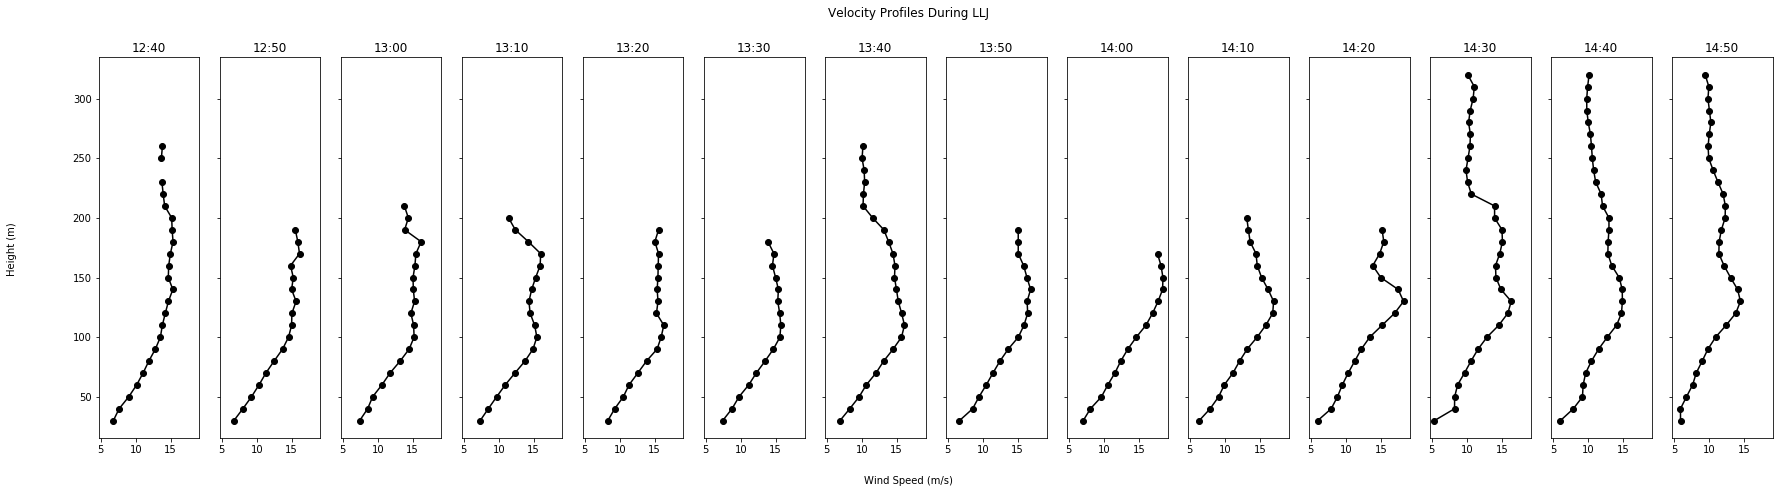

In [8]:
df_sdr = time_vs_height.copy()

time_int = pd.to_datetime("2017-02-17 12:40:00").tz_localize('UTC')
time_end = pd.to_datetime("2017-02-17 14:50:00").tz_localize('UTC')
 
resamp_size ='10min' #'1H'
resamp = df_sdr["wind speed"].resample(resamp_size).mean()

resamp_son = df_sonic.resample(resamp_size).mean()

times = resamp.index

b = int((time_end - time_int)/resamp_size )+1


heights = resamp.columns

series = pd.Series(index=heights)

# Prepare Plot
fig, axs = plt.subplots(nrows=1, ncols=b,sharex=True,sharey=True)
fig.set_figheight(7)
fig.set_figwidth(30)


fig.suptitle('Velocity Profiles During LLJ') 
fig.text(0.5, 0.04, 'Wind Speed (m/s)', ha='center', va='center')
fig.text(0.085, 0.5, 'Height (m)', ha='center', va='center', rotation='vertical')

i = -1

for t in times:
    if t >= time_int and t <= time_end:
        i = i + 1

        a = resamp.loc[t]
        end1 =a.values[-1]
        end2 = a.values[-2]
        if end1 == end2:
            a = a.replace(end2,np.nan)
            
        axs[i].plot(a.values, a.index,'-ok')
        t = str(t)
        t1 = t.split(" ")[1]
        t2 = t1.split(":00+")[0]
        axs[i].title.set_text(t2)

    
fig.savefig("../SODAR_LLJ_prof_5.png",bbox_inches="tight",dpi=500)

# Wind Shear on Blades


In [9]:
# Input Rotor Spans
small = [49, 119]
small = [50, 120]
med = [27, 153]
med = [30, 150]
larg = [30, 208] # meters
larg = [30, 210]


diamter = (larg[1] - larg[0])*1.1
print(diamter)
hb_ht = (larg[1] - larg[0])/2 + larg[0]
print(hb_ht)


198.00000000000003
120.0


In [3]:
(119-49)/2 + 49
(119-49)

70

## Plot Difference of Velocity Each Turbine Experiences

Text(2017-02-17 07:40:00+00:00, 1.6, 'LLJ REGION')

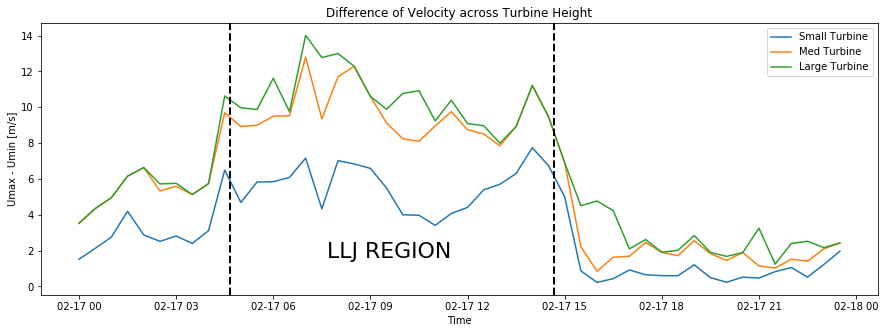

In [17]:
fig = plt.figure(figsize=(15,5))
df_sdr = time_vs_height.copy()
df_sdr = df_sdr.resample('30min').mean()
times = df_sdr.index
#times = times - times[0]

# Initialize
small_heights= range(small[0], small[1]+1,10)
med_heights = range(med[0], med[1]+1,10)
larg_heights = range(larg[0], larg[1]+1,10)

u_s = []
h_s = []
u_m = []
h_m = []
u_l = []
h_l = []
alp_s = []
alp_m = []
alp_l = [] 

for indx in df_sdr.index:
    
    u_max_s = 0.1
    u_max_m = 0.1
    u_max_l = 0.1

    u_min_s = 100
    u_min_m = 100
    u_min_l = 100
    
    df_now = df_sdr.loc[indx]['wind speed'] 

    
    for h in small_heights:
        u_now_s = df_now[h]
        #tau_now_s = np.log()
        if u_now_s > u_max_s:
            u_max_s = u_now_s
            h_max_s = h
        if u_now_s < u_min_s:
            u_min_s = u_now_s
            h_min_s = h
       # tau_now_s = np.log()   
        
    for h in med_heights:
        u_now_m = df_now[h]
        if u_now_m > u_max_m:
            u_max_m = u_now_m
            h_max_m = h
        if u_now_m < u_min_m:
            u_min_m = u_now_m
            h_min_m = h  
            
    for h in larg_heights:
        u_now_l = df_now[h]
        if u_now_l > u_max_l:
            u_max_l = u_now_l
            h_max_l = h
        if u_now_l < u_min_l:
            u_min_l = u_now_l
            h_min_l = h 
        
    u_diff_s = u_max_s - u_min_s
    h_diff_s = h_max_s - h_min_s
    alpha_s = np.log(u_max_s/u_min_s)/np.log(h_max_s/h_min_s) 
    
    u_diff_m = u_max_m - u_min_m
    h_diff_m = h_max_m - h_min_m
    alpha_m = np.log(u_max_m/u_min_m)/np.log(h_max_m/h_min_m)
    
    u_diff_l = u_max_l - u_min_l
    h_diff_l = h_max_l - h_min_l
    alpha_l = np.log(u_max_l/u_min_l)/np.log(h_max_l/h_min_l)

    u_s = np.append(u_s,u_diff_s)
    h_s = np.append(h_s,h_diff_s)
    u_m = np.append(u_m,u_diff_m)
    h_m = np.append(h_m,h_diff_m)
    u_l = np.append(u_l,u_diff_l)
    h_l = np.append(h_l,h_diff_l)
    
    alp_s = np.append(alp_s,alpha_s)
    alp_m = np.append(alp_m,alpha_m)
    alp_l = np.append(alp_l,alpha_l)        

# PLOT DATA
plt.plot(times, u_s,label = 'Small Turbine')
plt.plot(times,u_m,label = 'Med Turbine')
plt.plot(times,u_l,label = 'Large Turbine')
plt.legend()
plt.title('Difference of Velocity across Turbine Height')
plt.xlabel('Time')
plt.ylabel('Umax - Umin [m/s]')

plt.axvline(x='2017-02-17 04:40:00+00:00',linewidth=2, color='k',linestyle='--')
plt.axvline(x='2017-02-17 14:40:00+00:00',linewidth=2, color='k',linestyle='--')
plt.text('2017-02-17 07:40:00+00:00', 1.6, 'LLJ REGION', fontsize=22)
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%H:%M'))  

#fig.savefig("../Diff_velocity_turbines.png",bbox_inches="tight",dpi=500)

In [41]:

df_sdr = time_vs_height.copy()
df_sdr = df_sdr.loc['2017-02-17 04:40:00+00:00':'2017-02-17 14:40:00+00:00']
df_sdr = df_sdr.mean()
df_sdr

u_max_s = 0.1
u_max_m = 0.1
u_max_l = 0.1

u_min_s = 100
u_min_m = 100
u_min_l = 100


for h in small_heights:
        u_now_s = df_now[h]
        #tau_now_s = np.log()
        if u_now_s > u_max_s:
            u_max_s = u_now_s
            h_max_s = h
        if u_now_s < u_min_s:
            u_min_s = u_now_s
            h_min_s = h
       # tau_now_s = np.log()   
        
    for h in med_heights:
        u_now_m = df_now[h]
        if u_now_m > u_max_m:
            u_max_m = u_now_m
            h_max_m = h
        if u_now_m < u_min_m:
            u_min_m = u_now_m
            h_min_m = h  
            
    for h in larg_heights:
        u_now_l = df_now[h]
        if u_now_l > u_max_l:
            u_max_l = u_now_l
            h_max_l = h
        if u_now_l < u_min_l:
            u_min_l = u_now_l
            h_min_l = h 
        
    u_diff_s = u_max_s - u_min_s
    h_diff_s = h_max_s - h_min_s
    alpha_s = np.log(u_max_s/u_min_s)/np.log(h_max_s/h_min_s) 
    
    u_diff_m = u_max_m - u_min_m
    h_diff_m = h_max_m - h_min_m
    alpha_m = np.log(u_max_m/u_min_m)/np.log(h_max_m/h_min_m)
    
    u_diff_l = u_max_l - u_min_l
    h_diff_l = h_max_l - h_min_l
    alpha_l = np.log(u_max_l/u_min_l)/np.log(h_max_l/h_min_l)

            height
wind speed  30.0       6.856230
            40.0       7.922787
            50.0       9.193279
            60.0      10.124426
            70.0      11.033934
            80.0      11.780820
            90.0      12.548033
            100.0     13.329180
            110.0     14.067869
            120.0     14.748852
            130.0     15.378525
            140.0     15.920492
            150.0     16.245410
            160.0     16.403607
            170.0     16.525082
            180.0     16.418689
            190.0     16.477705
            200.0     16.466066
            210.0     16.353279
            220.0     16.140656
            230.0     16.035082
            240.0     15.993443
            250.0     15.947869
            260.0     15.923934
            270.0     15.888033
            280.0     15.920984
            290.0     15.939016
            300.0     15.937213
            310.0     15.948361
            320.0     15.896885
dtype: float64

# Plot Shear Exponent for each turbine

In [ ]:
fig = plt.figure(figsize=(15,5))
# PLOT DATA
plt.plot(times, alp_s,label = 'Small Turbine')
plt.plot(times,alp_m,label = 'Med Turbine')
plt.plot(times,alp_l,label = 'Large Turbine')
plt.legend()
plt.title('Shear Coefficent')
plt.xlabel('Time')
plt.ylabel('alpha')
plt.legend()

plt.axvline(x='2017-02-17 04:40:00+00:00',linewidth=2, color='k',linestyle='--')
plt.axvline(x='2017-02-17 14:40:00+00:00',linewidth=2, color='k',linestyle='--')
plt.text('2017-02-17 07:40:00+00:00', 0.02, 'LLJ REGION', fontsize=22)